# Sepsis Dataset

In [3]:
# Imports
import pandas as pd
import seaborn as sns
import joblib 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [4]:
sepsisData = pd.read_csv('data/sepsis-dataset.csv')
sepsisData.head()

Unnamed: 0  Hour    HR  O2Sat  Temp    SBP   MAP   DBP  Resp  EtCO2  ...  \
0           0     0   NaN    NaN   NaN    NaN   NaN   NaN   NaN    NaN  ...   
1           1     1  65.0  100.0   NaN    NaN  72.0   NaN  16.5    NaN  ...   
2           2     2  78.0  100.0   NaN    NaN  42.5   NaN   NaN    NaN  ...   
3           3     3  73.0  100.0   NaN    NaN   NaN   NaN  17.0    NaN  ...   
4           4     4  70.0  100.0   NaN  129.0  74.0  69.0  14.0    NaN  ...   

   Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  ICULOS  \
0         NaN        NaN  68.54       0    NaN    NaN        -0.02       1   
1         NaN        NaN  68.54       0    NaN    NaN        -0.02       2   
2         NaN        NaN  68.54       0    NaN    NaN        -0.02       3   
3         NaN        NaN  68.54       0    NaN    NaN        -0.02       4   
4         NaN      330.0  68.54       0    NaN    NaN        -0.02       5   

   SepsisLabel  Patient_ID  
0            0       17072  
1            0       17072  
2            0       17072  
3            0       17072  
4            0       17072  

[5 rows x 44 columns]

In [5]:
sepsisData = sepsisData.filter(items=['Temp', 'O2Sat', 'Age', 'Gender', 'SepsisLabel'])
sepsisData

Temp  O2Sat    Age  Gender  SepsisLabel
0         NaN    NaN  68.54       0            0
1         NaN  100.0  68.54       0            0
2         NaN  100.0  68.54       0            0
3         NaN  100.0  68.54       0            0
4         NaN  100.0  68.54       0            0
...       ...    ...    ...     ...          ...
1552205   NaN   99.0  88.00       0            0
1552206   NaN   92.0  88.00       0            0
1552207  36.7   97.0  88.00       0            0
1552208   NaN   99.0  88.00       0            0
1552209   NaN   99.0  88.00       0            0

[1552210 rows x 5 columns]

In [6]:
sepsisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Temp         525226 non-null   float64
 1   O2Sat        1349474 non-null  float64
 2   Age          1552210 non-null  float64
 3   Gender       1552210 non-null  int64  
 4   SepsisLabel  1552210 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 59.2 MB


In [7]:
p1 = sns.heatmap(sepsisData.corr(), annot=True, annot_kws={"size": 7})

<Axes: >

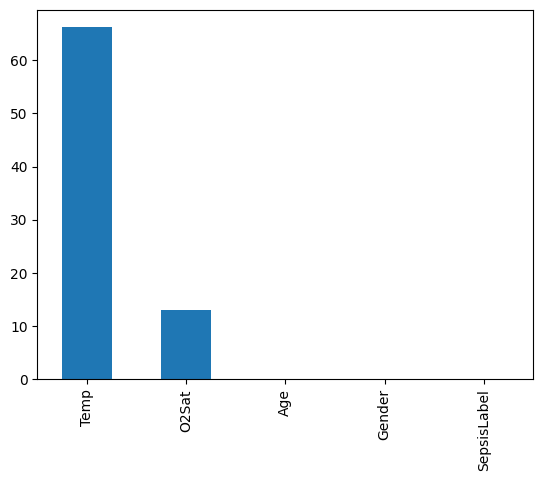

In [8]:
round(100 * (sepsisData.isnull().sum() / len(sepsisData.index)),2).plot.bar()

## 60+% of missing data

# Post Operative Data

In [9]:
postOperativeData = pd.read_csv('data/post-operative-data.csv')
postOperativeData.head()

L-CORE L-SURF       L-O2  L-BP SURF-STBL CORE-STBL     BP-STBL COMFORT  \
0    mid    low  excellent   mid    stable    stable      stable      15   
1    mid   high  excellent  high    stable    stable      stable      10   
2   high    low  excellent  high    stable    stable  mod-stable      10   
3    mid    low       good  high    stable  unstable  mod-stable      15   
4    mid    mid  excellent  high    stable    stable      stable      10   

  decision ADM-DECS  
0                 A  
1                 S  
2                 A  
3                A   
4                 A

In [10]:
postOperativeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   L-CORE             90 non-null     object
 1   L-SURF             90 non-null     object
 2   L-O2               90 non-null     object
 3   L-BP               90 non-null     object
 4   SURF-STBL          90 non-null     object
 5   CORE-STBL          90 non-null     object
 6   BP-STBL            90 non-null     object
 7   COMFORT            90 non-null     object
 8   decision ADM-DECS  90 non-null     object
dtypes: object(9)
memory usage: 6.5+ KB


In [11]:
postOperativeData.describe()

L-CORE L-SURF  L-O2 L-BP SURF-STBL CORE-STBL BP-STBL COMFORT  \
count      90     90    90   90        90        90      90      90   
unique      3      3     2    3         2         3       3       5   
top       mid    mid  good  mid    stable    stable  stable      10   
freq       58     48    47   57        45        83      46      65   

       decision ADM-DECS  
count                 90  
unique                 4  
top                    A  
freq                  63

In [12]:
postOperativeData = postOperativeData.drop(columns=['L-BP', 'BP-STBL'])

In [13]:
postOperativeData

L-CORE L-SURF       L-O2 SURF-STBL CORE-STBL COMFORT decision ADM-DECS
0     mid    low  excellent    stable    stable      15                 A
1     mid   high  excellent    stable    stable      10                 S
2    high    low  excellent    stable    stable      10                 A
3     mid    low       good    stable  unstable      15                A 
4     mid    mid  excellent    stable    stable      10                 A
..    ...    ...        ...       ...       ...     ...               ...
85    mid    mid  excellent  unstable    stable      10                 A
86    mid    mid  excellent  unstable    stable      15                 S
87    mid    mid       good  unstable    stable      15                 A
88    mid    mid  excellent  unstable    stable      10                 A
89    mid    mid       good  unstable    stable      15                 S

[90 rows x 7 columns]

# Columns

## L-CORE (patient's internal temperature in C):

- high (> 37)
- mid (>= 36 and <= 37)
- low (< 36)

## L-SURF (patient's surface temperature in C):

- h
high (> 36
- mid (>= 36.5 and <= 35)
- low (< 35)

## L-O2 (oxygen saturation in %):

- excellent (>= 98)
- good (>= 90 and < 98)
- fair (>= 80 and < 90)
- poor (< 80)

## SURF-STBL (stability of patient's surface temperature):

- stable
- mod-stable
- unstable 
## CORE-STBL (stability of patient's core temperature)

- stable
- mod-stable
- unstableble,unstable

### decision ADM-DECS (discharge decision):

-  I (patient sent to Intensive Care Unit)
- S (patient prepared to go home)
-  A (patient sent to general hospital floor)loor)

# Hospital Mortality

In [14]:
hospitalMortality = pd.read_csv('data/hospital-mortality.csv')
pd.set_option('display.max_columns', None)
hospitalMortality.head()

group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  deficiencyanemias  \
0                   0               0         1                  1   
1                   0               0         0                  1   
2                   0               0         0                  1   
3                   0               0         0                  0   
4                   0               0         0                  1   

   depression  Hyperlipemia  Renal failure  COPD  heart rate  \
0           0             1              1     0   68.837838   
1           0             0              0     1  101.370370   
2           0             0              1     0   72.318182   
3           0             0              0     0   94.500000   
4           0             0              1     1   67.920000   

   Systolic blood pressure  Diastolic blood pressure  Respiratory rate  \
0               155.866667                 68.333333         16.621622   
1               140.000000                 65.000000         20.851852   
2               135.333333                 61.375000         23.640000   
3               126.400000                 73.200000         21.857143   
4               156.560000                 58.120000         21.360000   

   temperature      SP O2  Urine output  hematocrit       RBC        MCH  \
0    36.714286  98.394737        2155.0   26.272727  2.960000  28.250000   
1    36.682540  96.923077        1425.0   30.780000  3.138000  31.060000   
2    36.453704  95.291667        2425.0   27.700000  2.620000  34.320000   
3    36.287037  93.846154        8760.0   36.637500  4.277500  26.062500   
4    36.761905  99.280000        4455.0   29.933333  3.286667  30.666667   

        MCHC      MCV        RDW  Leucocyte  Platelets  Neutrophils  \
0  31.520000   89.900  16.220000   7.650000    305.100        74.65   
1  31.660000   98.200  14.260000  12.740000    246.400          NaN   
2  31.300000  109.800  23.820000   5.480000    204.200        68.10   
3  30.412500   85.625  17.037500   8.225000    216.375        81.80   
4  33.666667   91.000  16.266667   8.833333    251.000          NaN   

   Basophils  Lymphocyte         PT       INR  NT-proBNP  Creatine kinase  \
0       0.40        13.3  10.600000  1.000000     1956.0       148.000000   
1        NaN         NaN        NaN       NaN     2384.0        60.600000   
2       0.55        24.5  11.275000  0.950000     4081.0        16.000000   
3       0.15        14.5  27.066667  2.666667      668.0        85.000000   
4        NaN         NaN        NaN       NaN    30802.0       111.666667   

   Creatinine  Urea nitrogen     glucose  Blood potassium  Blood sodium  \
0    1.958333      50.000000  114.636364         4.816667    138.750000   
1    1.122222      20.333333  147.500000         4.450000    138.888889   
2    1.871429      33.857143  149.000000         5.825000    140.714286   
3    0.585714      15.285714  128.250000         4.386667    138.500000   
4    1.950000      43.000000  145.750000         4.783333    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2       8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4       8.733333  104.500000  15.166667       1.650000  7.250    22.000000   

   Lactic acid  PCO2  EF  
0          0.5  40.0  55  
1          0.5  78.0  

In [15]:
hospitalMortality.describe()

group             ID      outcome          age      gendera  \
count  1177.000000    1177.000000  1176.000000  1177.000000  1177.000000   
mean      1.299065  150778.120646     0.135204    74.055225     1.525064   
std       0.458043   29034.669513     0.342087    13.434061     0.499584   
min       1.000000  100213.000000     0.000000    19.000000     1.000000   
25%       1.000000  125603.000000     0.000000    65.000000     1.000000   
50%       1.000000  151901.000000     0.000000    77.000000     2.000000   
75%       2.000000  176048.000000     0.000000    85.000000     2.000000   
max       2.000000  199952.000000     1.000000    99.000000     2.000000   

              BMI  hypertensive  atrialfibrillation  CHD with no MI  \
count  962.000000   1177.000000         1177.000000     1177.000000   
mean    30.188278      0.717927            0.451147        0.085811   
std      9.325997      0.450200            0.497819        0.280204   
min     13.346801      0.000000            0.000000        0.000000   
25%     24.326461      0.000000            0.000000        0.000000   
50%     28.312474      1.000000            0.000000        0.000000   
75%     33.633509      1.000000            1.000000        0.000000   
max    104.970366      1.000000            1.000000        1.000000   

          diabetes  deficiencyanemias   depression  Hyperlipemia  \
count  1177.000000        1177.000000  1177.000000   1177.000000   
mean      0.421410           0.338997     0.118946      0.379779   
std       0.493995           0.473570     0.323863      0.485538   
min       0.000000           0.000000     0.000000      0.000000   
25%       0.000000           0.000000     0.000000      0.000000   
50%       0.000000           0.000000     0.000000      0.000000   
75%       1.000000           1.000000     0.000000      1.000000   
max       1.000000           1.000000     1.000000      1.000000   

       Renal failure         COPD   heart rate  Systolic blood pressure  \
count    1177.000000  1177.000000  1164.000000              1161.000000   
mean        0.365336     0.075616    84.575848               117.995035   
std         0.481729     0.264495    16.018701                17.367618   
min         0.000000     0.000000    36.000000                75.000000   
25%         0.000000     0.000000    72.371250               105.391304   
50%         0.000000     0.000000    83.610799               116.128205   
75%         1.000000     0.000000    95.907143               128.625000   
max         1.000000     1.000000   135.708333               203.000000   

       Diastolic blood pressure  Respiratory rate  temperature        SP O2  \
count               1161.000000       1164.000000  1158.000000  1164.000000   
mean                  59.534497         20.801511    36.677286    96.272900   
std                   10.684681          4.002987     0.607558     2.298002   
min                   24.736842         11.137931    33.250000    75.916667   
25%                   52.173913         17.925694    36.286045    95.000000   
50%                   58.461538         20.372308    36.650794    96.452273   
75%                   65.464286         23.391200    37.021991    97.917500   
max                  107.000000         40.900000    39.132478   100.000000   

       Urine output   hematocrit          RBC          MCH         MCHC  \
count   1141.000000  1177.000000  1177.000000  1177.000000  1177.000000   
mean    1899.276512    31.914014     3.575010    29.539939    32.864327   
std     1272.363631     5.202102     0.626835     2.619054     1.402302   
min        0.000000    20.311111     2.030000    18.125000    27.825000   
25%      980.000000    28.160000     3.120000    28.250000    32.011111   
50%     1675.000000    30.800000     3.490000    29.750000    32.985714   
75%     2500.000000    35.012500     3.900000    31.240000    33.825000   
max     8820.000000    55.425000     6.575000    40.314286    37.011111   

           

In [16]:
hospitalMortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [17]:
hospitalMortality = hospitalMortality.filter(items=['age', 'gendera', 'temperature', 'SP O2', 'outcome'])
hospitalMortality

age  gendera  temperature      SP O2  outcome
0      72        1    36.714286  98.394737      0.0
1      75        2    36.682540  96.923077      0.0
2      83        2    36.453704  95.291667      0.0
3      43        2    36.287037  93.846154      0.0
4      75        2    36.761905  99.280000      0.0
...   ...      ...          ...        ...      ...
1172   62        1    37.055556  94.130435      0.0
1173   78        1    35.972222  93.526316      0.0
1174   85        2    36.777778  98.800000      0.0
1175   79        2    36.422222  99.560000      0.0
1176   47        1    37.716667  99.652174      0.0

[1177 rows x 5 columns]

<Axes: >

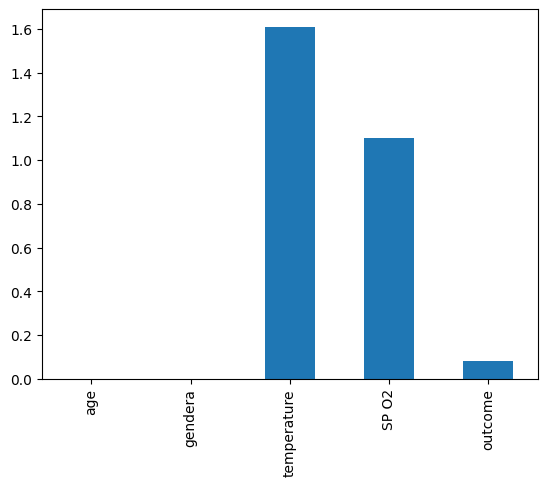

In [18]:
round(100 * (hospitalMortality.isnull().sum() / len(hospitalMortality.index)),2).plot.bar()

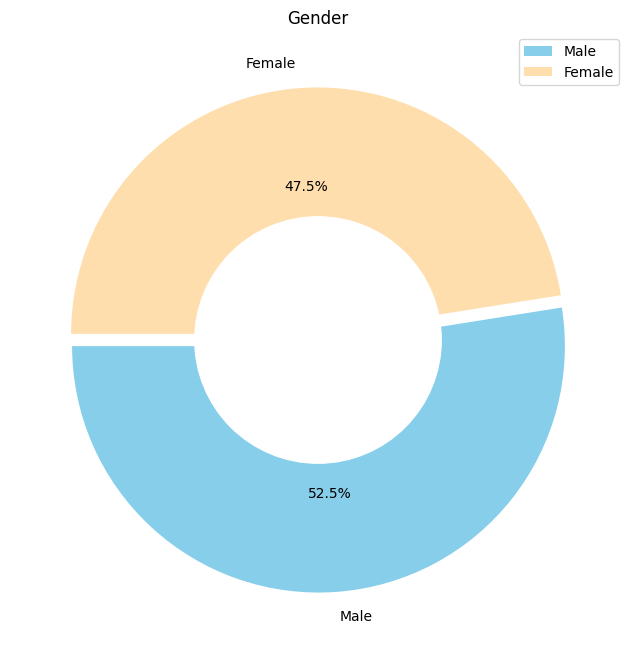

In [19]:
plt.figure(figsize=(12,8))
plt.title("Gender")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(hospitalMortality.gendera.value_counts(), explode=(0.025,0.025),  labels=['Male','Female'], colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

## Pre-processing

### Deleteing missing rows

In [20]:
hospitalMortality = hospitalMortality.dropna()

### Getting X and Y, then split into training and testing dataset

In [21]:
y = hospitalMortality['outcome']
print(y)
X = hospitalMortality.drop('outcome', axis=1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1172    0.0
1173    0.0
1174    0.0
1175    0.0
1176    0.0
Name: outcome, Length: 1158, dtype: float64


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train, X_test, y_train, y_test)

     age  gendera  temperature      SP O2
786   79        1    36.398149  96.038462
480   50        2    36.870371  91.750000
447   82        1    34.672223  98.219512
135   89        2    36.798611  97.120000
528   73        1    36.600000  98.400000
..   ...      ...          ...        ...
683   87        2    35.833334  96.480000
422   71        1    37.007937  96.384615
574   84        1    35.907407  96.760000
140   68        1    36.673612  95.461538
49    84        1    37.619048  95.137931

[810 rows x 4 columns]       age  gendera  temperature      SP O2
1090   37        1    36.644444  98.040000
1174   85        2    36.777778  98.800000
87     55        2    36.962963  98.153846
1071   57        1    38.643518  97.750000
498    89        1    37.708333  97.640000
...   ...      ...          ...        ...
500    91        1    36.814815  97.625000
22     86        2    36.069445  98.103448
380    89        2    37.027778  98.750000
126    61        2    37.142857  97.566667

## Training
### Fit Logistic Regressor and Neural Network with training sets

In [23]:
lr = LogisticRegression(
    max_iter=1500
).fit(X_train, y_train)

In [24]:
mlpc = MLPClassifier(
    max_iter=1500
).fit(X_train, y_train)

In [25]:
mlpcParams = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlpcGridSearch = GridSearchCV(mlpc, mlpcParams, n_jobs=-1, cv=5)
mlpcGridSearchResult = mlpcGridSearch.fit(X, y)

In [26]:
print("Best: %f using %s" % (mlpcGridSearchResult.best_score_ * 100, mlpcGridSearchResult.best_params_))
means = mlpcGridSearchResult.cv_results_['mean_test_score']
stds = mlpcGridSearchResult.cv_results_['std_test_score']
params = mlpcGridSearchResult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean * 100, stdev, param))

Best: 86.614793 using {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}
86.356173 (0.001828) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
86.356173 (0.001828) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}
86.356173 (0.001828) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
86.356173 (0.001828) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
86.356173 (0.001828) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
86.356173 (0.001828) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant

## Testing
### Get accuracy score

In [27]:
accuracy_score(y_test, lr.predict(X_test)) * 100

86.49425287356321

In [28]:
accuracy_score(y_test, mlpc.predict(X_test)) * 100

86.49425287356321

In [29]:
accuracy_score(y_test, mlpcGridSearchResult.predict(X_test)) * 100

86.49425287356321

## Predict

In [30]:
mlpcGridSearchResult.predict(pd.DataFrame({
    "age": [74],
    "gendera": [2],
    "temperature": [50],
    "SP O2": [90]
}))[0]

0.0

In [31]:
# joblib.dump(lr, 'hospital_mortality_LR.pkl')
# joblib.dump(mlpc, 'hospital_mortality_MLPC.pkl')
joblib.dump(mlpcGridSearchResult, 'hospital_mortality_GS.pkl')

['hospital_mortality_GS.pkl']

# Sickness Data

### Read CSV data file and see overall info

In [32]:
sicknessData = pd.read_csv('data/Health data.csv')

In [33]:
sicknessData

pulse  body temperature  SpO2  Status
0        70              36.0    99       0
1        70              36.0    98       0
2        70              36.0    97       0
3        70              36.0    96       0
4        70              36.1   100       0
...     ...               ...   ...     ...
5904     88              38.9    85       2
5905     88              38.9    86       2
5906     88              38.9    87       2
5907     88              38.9    88       2
5908     88              38.9    89       2

[5909 rows x 4 columns]

In [34]:
sicknessData = sicknessData.drop(columns=['pulse'])

In [35]:
sicknessData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   body temperature  5909 non-null   float64
 1   SpO2              5909 non-null   int64  
 2   Status            5909 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 138.6 KB


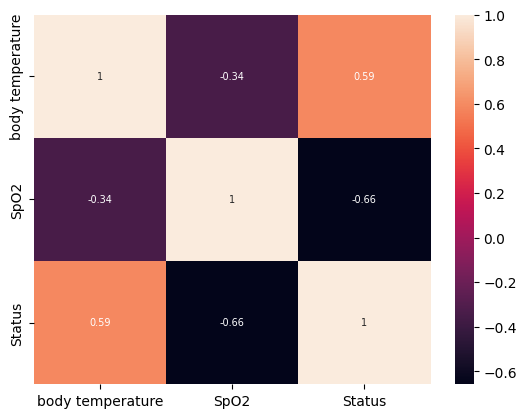

In [36]:
p1 = sns.heatmap(sicknessData.corr(), annot=True, annot_kws={"size": 7})

## Pre-processing
### Getting X and Y, then split into training and testing dataset

In [37]:
y = sicknessData['Status']
print(y)
X = sicknessData.drop('Status', axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
5904    2
5905    2
5906    2
5907    2
5908    2
Name: Status, Length: 5909, dtype: int64


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train, X_test, y_train, y_test)

      body temperature  SpO2
1582              37.5    95
3941              36.5    96
3477              36.9    96
2714              36.8    91
4644              40.4    91
...                ...   ...
880               36.6    99
5137              40.6    92
1035              37.9    98
3391              36.8    94
2590              38.7    95

[4136 rows x 2 columns]       body temperature  SpO2
5292              38.6    88
5051              39.2    90
354               36.1   100
4060              40.6    95
1955              38.9    98
...                ...   ...
5808              38.4    89
5421              38.2    87
3289              36.2    92
4706              39.4    93
5452              38.8    88

[1773 rows x 2 columns] 1582    1
3941    2
3477    2
2714    1
4644    2
       ..
880     0
5137    2
1035    1
3391    1
2590    1
Name: Status, Length: 4136, dtype: int64 5292    2
5051    2
354     0
4060    2
1955    1
       ..
5808    2
5421    2
3289    1
4706    2
545

## Training
### Fit Logistic Regressor and Neural Network with training sets

In [39]:
sicknessLR = LogisticRegression(
    max_iter=1500
).fit(X_train, y_train)

In [40]:
accuracy_score(y_test, sicknessLR.predict(X_test)) * 100

84.60236886632826

In [41]:
sicknessMLPC = MLPClassifier(
    max_iter=1500
).fit(X_train, y_train)

In [42]:
accuracy_score(y_test, sicknessMLPC.predict(X_test)) * 100

87.36604624929498

## Optimisation
### Grid Search to find best hyperparameter to use

In [43]:
lrParams = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'C': [100, 10, 1.0, 0.1, 0.01]
}

sicknessLRGridSearch = GridSearchCV(estimator=sicknessLR, param_grid=lrParams, n_jobs=4, scoring='accuracy')
sicknessLRGridSearchResult = sicknessLRGridSearch.fit(X, y)

In [44]:
print("Best: %f using %s" % (sicknessLRGridSearchResult.best_score_ * 100, sicknessLRGridSearchResult.best_params_))
means = sicknessLRGridSearchResult.cv_results_['mean_test_score']
stds = sicknessLRGridSearchResult.cv_results_['std_test_score']
params = sicknessLRGridSearchResult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean * 100, stdev, param))

Best: 79.997937 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
77.896474 (0.144552) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
77.727269 (0.145943) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
73.563744 (0.145310) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
77.896474 (0.144552) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
77.625747 (0.147576) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
74.985923 (0.136310) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
77.828792 (0.143798) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
77.727269 (0.145943) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
78.304686 (0.130974) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
77.321006 (0.147093) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
78.065679 (0.150453) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
79.997937 (0.134547) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
75.594717 

In [45]:
sicknessMLPCGridSearch = GridSearchCV(sicknessMLPC, mlpcParams, n_jobs=-1, cv=5)
sicknessMLPCGridSearchResult = sicknessMLPCGridSearch.fit(X, y)

In [46]:
print("Best: %f using %s" % (sicknessMLPCGridSearchResult.best_score_ * 100, sicknessMLPCGridSearchResult.best_params_))
means = sicknessMLPCGridSearchResult.cv_results_['mean_test_score']
stds = sicknessMLPCGridSearchResult.cv_results_['std_test_score']
params = sicknessMLPCGridSearchResult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean * 100, stdev, param))

Best: 86.462761 using {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
54.626482 (0.151217) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
75.041671 (0.227504) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}
50.606286 (0.162718) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
85.566377 (0.160029) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
68.230543 (0.212315) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
85.989389 (0.159726) with: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant

## Predict

In [47]:
sicknessMLPCGridSearchResult.predict(pd.DataFrame({
    'body temperature': [36],
    'SpO2': [95]
}))[0]

1

## Export
### Export the models as .pkl files using joblib

In [48]:
joblib.dump(sicknessMLPCGridSearchResult, 'sickness_MLPC_GS.pkl')

['sickness_MLPC_GS.pkl']

In [49]:
joblib.load('sickness_MLPC_GS.pkl').predict(
    pd.DataFrame({
        'body temperature': [36],
        'SpO2': [95]
    })
)[0]

1